In [1]:
import os
import numpy as np
import scipy.io as sio
import h5py
import matplotlib.pyplot as plt 

# signal processing 
import scipy.signal as ssignal

# fancy plot stuff 
import sciplotlib.style as splstyle
import sciplotlib.polish as splpolish 



Grid layout is based on the manual here:
    https://www.multichannelsystems.com/sites/multichannelsystems.com/files/documents/manuals/MEA_Manual.pdf

# Load matlab path

In [2]:
mat_filepath = '/home/timsit/mecp2/data/PAT200219_2C_DIV17.mat'

In [4]:
f = h5py.File(mat_filepath)
data_dict = {}
for k, v in f.items():
    data_dict[k] = np.array(v)

/home/timsit/.conda/envs/mecp2/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [4]:
data_dict.keys()

dict_keys(['ADCz', 'channels', 'dat', 'fs', 'header', 'uV'])

In [27]:
raw_data = data_dict['dat']
channel_number = data_dict['channels'][0]

In [6]:
np.shape(raw_data)

(60, 3002500)

In [48]:
# This is ported from: https://github.com/Timothysit/mecp2/blob/master/Matlab_Analysis/heatMap/makeHeatMap.m
def make_grid_matrix(data_vec, num_x_channel=8, num_y_channel=8, grounded_electrode=[15]):
    
    grid_matrix = np.zeros((num_x_channel, num_y_channel))
    
    # remove the four corners 
    grid_matrix[0, 0] = np.nan
    grid_matrix[0, 7] = np.nan
    grid_matrix[7, 0] = np.nan 
    grid_matrix[7, 7] = np.nan
    
    num_channel = len(data_vec)
    
    if num_channel == 60:
        
        grid_matrix.T.flat[1:7] = data_vec[0:6]
        grid_matrix.T.flat[8:56] = data_vec[6:54]
        grid_matrix.T.flat[57:63] = data_vec[54:60]
        

    
    return grid_matrix

In [14]:
example_data_vec = np.mean(raw_data, axis=1)
grid_matrix = make_grid_matrix(data_vec=example_data_vec)

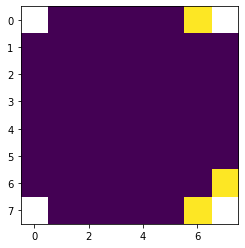

In [16]:
plt.imshow(grid_matrix)

In [49]:
grid_channel_num_matrix = make_grid_matrix(data_vec=np.sort(channel_number))

In [50]:
len(channel_number)

60

In [51]:
grid_channel_num_matrix

array([[nan, 21., 31., 41., 51., 61., 71., nan],
       [12., 22., 32., 42., 52., 62., 72., 82.],
       [13., 23., 33., 43., 53., 63., 73., 83.],
       [14., 24., 34., 44., 54., 64., 74., 84.],
       [15., 25., 35., 45., 55., 65., 75., 85.],
       [16., 26., 36., 46., 56., 66., 76., 86.],
       [17., 27., 37., 47., 57., 67., 77., 87.],
       [nan, 28., 38., 48., 58., 68., 78., nan]])

In [71]:
def plot_grid_layout(fig=None, ax=None, grid_matrix=None, grid_channel_num_matrix=None):
    
    if (fig is None) and (ax is None):
        fig, ax = plt.subplots()
        fig.set_size_inches(4, 4)
    
    if grid_matrix is not None:
        ax.imshow(grid_matrix)
    else:
        ax.imshow(np.tile(np.nan, np.shape(grid_channel_num_matrix)))
    
    if grid_channel_num_matrix is not None:
        
        for i in range(np.shape(grid_channel_num_matrix)[0]):
            for j in range(np.shape(grid_channel_num_matrix)[1]):
                text = ax.text(j, i, grid_channel_num_matrix[i, j], ha='center', va='center', color='black')
            
    # Annotate channel number
    
    
    return fig, ax

/home/timsit/.conda/envs/mecp2/lib/python3.7/site-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/home/timsit/.conda/envs/mecp2/lib/python3.7/site-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/timsit/.conda/envs/mecp2/lib/python3.7/site-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/home/timsit/.conda/envs/mecp2/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


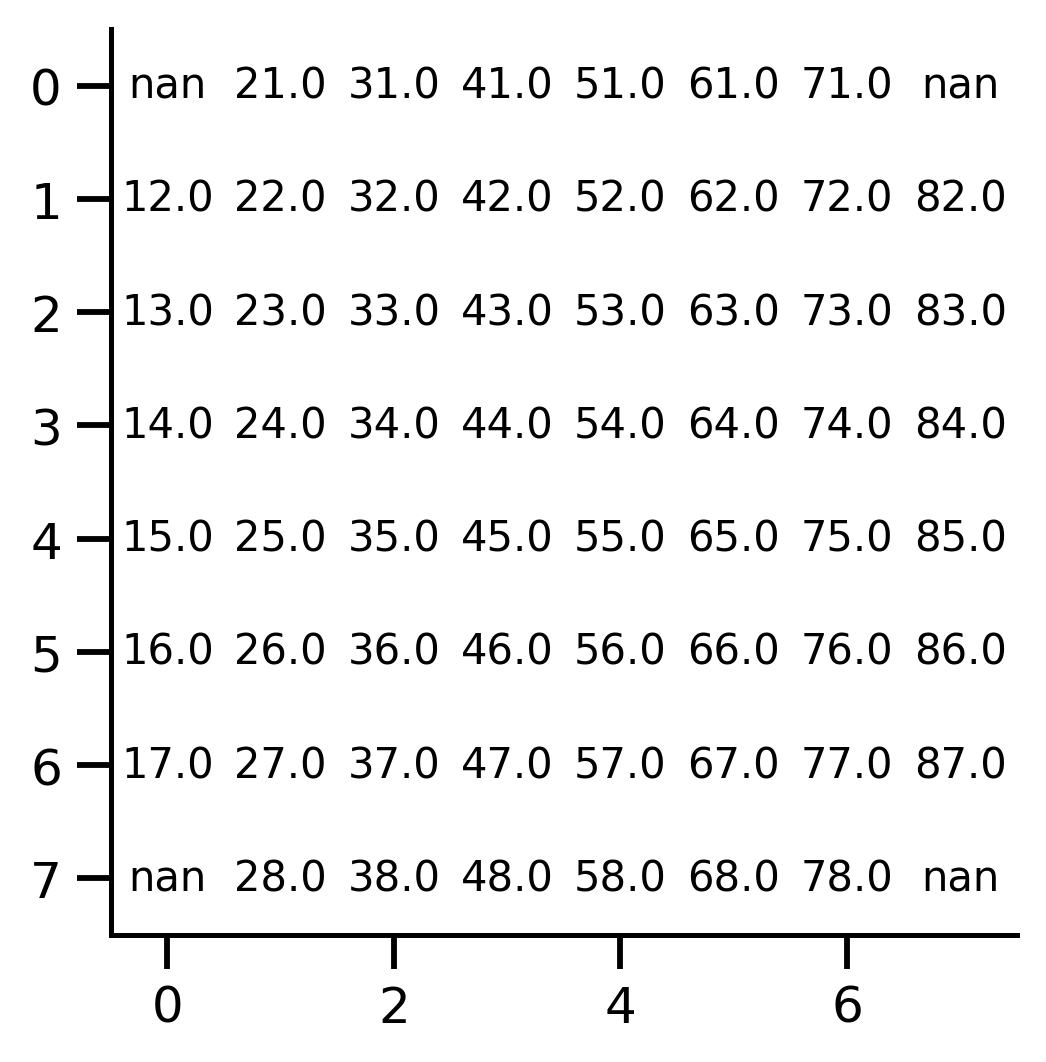

In [72]:
with plt.style.context(splstyle.get_style('nature-reviews')):
    fig, ax = plot_grid_layout(grid_channel_num_matrix=grid_channel_num_matrix)

## Also look into reading the mcd file 

https://bitbucket.org/galenea/pymcstream/src/default/